# 부정보험청구 탐지 실습

## 데이터셋

- 미국 보험금 부정청구 데이터
- 1000개 데이터
- 39개 칼럼

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fintech-data/Revolution2/main/data/insurance_claims.csv")

- months_as_customer : int 보험금 납입 기간(누적, 개월)
- age	: int 연령
- policy_number :  int 보험 가입번호
- policy_bind_date : str 보험 계약일
- policy_state : str 보험 계약자 주
- policy_csl : 보험한도  : str 사고 발생 시 1인당 보험금 한도액 / 전체 보험금 한도액 (단위 :  천달러)
- policy_deductable :  int 보험의 자기부담금
- policy_annual_premium	: float 연간보험료
- umbrella_limit	: int 보험금 한도
- insured_zip : int피보험자 우편번호
- insured_sex  : str피보험자  성별
- insured_education_level	:str   피보험자  교육수준
- insured_occupation	insured_hobbies :str  피보험자의 취미
- insured_relationship :str 피보험자 와 보험계약자의 관계
- capital-gains : int 자본이득
- capital-loss :  int 자본손실
- incident_date	: str 보험 사고 일자
- incident_type	: str 보험 사고의 종류
- collision_type	: str 충돌 유형
- incident_severity : str 손상정도
- authorities_contacted :  str 보험사고 발생 당시 연락기관(경찰서, 소방서 등)
- incident_state :  str 사고 발생 지역
- incident_city : 	str 사고 발생 도시
- incident_location : 	str 사고 발생 위치
- incident_hour_of_the_day : int  사고 발생 시각 (예: 20시 경)
- number_of_vehicles_involved	: int  총 사고 발생 차량 수
- property_damage : str  재산 피해 여부
- bodily_injuries	: int  신체 피해 정도( 0 : 없음, 1: 경상 2: 중상)
- witnesses	: int  사고 목격자 수
- police_report_available : str  	경찰 보고서 확인 가능 여부
- total_claim_amount : int  총 보험금 청구금액
- injury_claim : int  상해 청구금액
- property_claim :int  재산 피해 청구 금액
- vehicle_claim :int  차량 피해 청구금액
- auto_make :str  자동차 제조사
- auto_model :str  자동차 모델
- auto_year :int  자동차 연식
- fraud_reported :str  허위 청구여부 (허위청구 :  Y / 정상청구 : N)

## EDA (탐색적 데이터 분석)

### 데이터 확인

- 데이터 일부 확인 (전치)

In [2]:
df.head()
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
print(df.head().T)

                                                    0                  1  \
months_as_customer                                328                228   
age                                                48                 42   
policy_number                                  521585             342868   
policy_bind_date                           2014-10-17         2006-06-27   
policy_state                                       OH                 IN   
policy_csl                                    250/500            250/500   
policy_deductable                                1000               2000   
policy_annual_premium                         1406.91            1197.22   
umbrella_limit                                      0            5000000   
insured_zip                                    466132             468176   
insured_sex                                      MALE               MALE   
insured_education_level                            MD                 MD   
insured_occu

- 데이터 행, 열 개수 확인

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1000
Number of columns: 39


- 칼럼 목록, 데이터타입 확인

In [5]:
print("Columns and data types:")
print(df.dtypes)

Columns and data types:
months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
i

- 종속변수(y) 별 데이터 비율 확인

In [7]:
dependent_variable = 'fraud_reported' # 종속변수(y)

dependent_variable_ratio = df[dependent_variable].value_counts(normalize=True)
print(f"{dependent_variable} ratio:")
print(dependent_variable_ratio)

fraud_reported ratio:
fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64


- 결측값 확인 (칼럼 별 결측값 개수, 퍼센티지 확인)

In [8]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

missing_data_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage,
})

print("Missing values:")
print(missing_data_df)

Missing values:
                             Missing Values  Percentage
months_as_customer                        0         0.0
age                                       0         0.0
policy_number                             0         0.0
policy_bind_date                          0         0.0
policy_state                              0         0.0
policy_csl                                0         0.0
policy_deductable                         0         0.0
policy_annual_premium                     0         0.0
umbrella_limit                            0         0.0
insured_zip                               0         0.0
insured_sex                               0         0.0
insured_education_level                   0         0.0
insured_occupation                        0         0.0
insured_hobbies                           0         0.0
insured_relationship                      0         0.0
capital-gains                             0         0.0
capital-loss                    

- 문자열로 된 데이터에 대하여 LabelEncoding 적용

In [11]:
#from sklearn.preprocessing import LabelEncoder

#def object_to_int(dataframe_series):
    #############################################
    # series의 데이터타입이 object면 라벨인코더 적용
    #############################################

#    return dataframe_series

# 원래 데이터에 적용
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

# 원래 데이터에 적용
df = df.apply(object_to_int)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

### plotting

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

C:\Users\user\AppData\Local\Temp\ipykernel_5424\3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

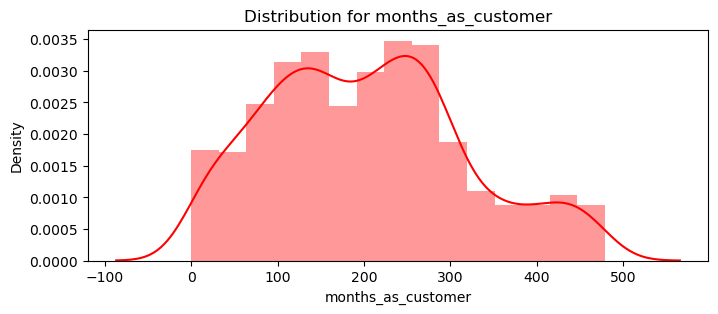

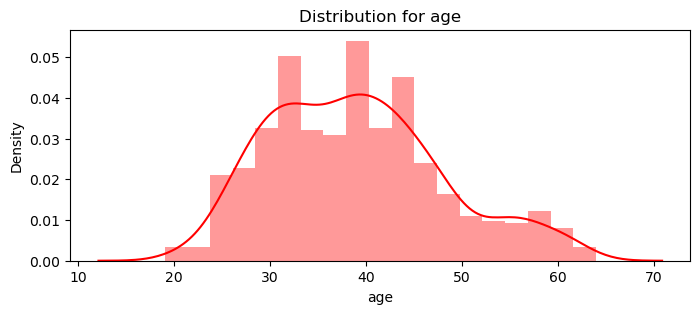

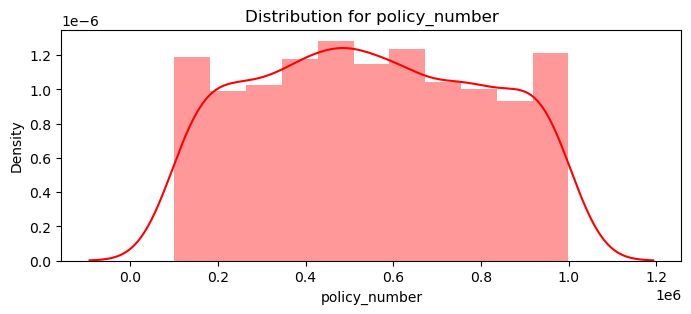

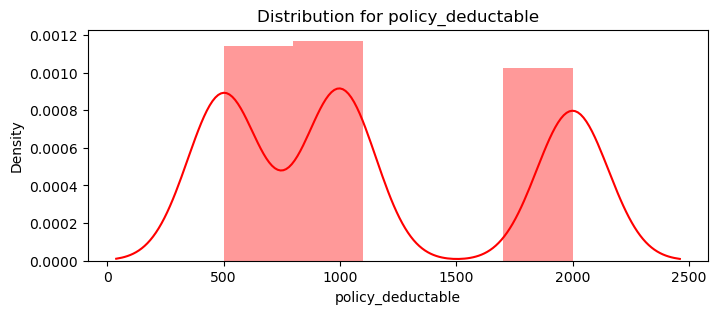

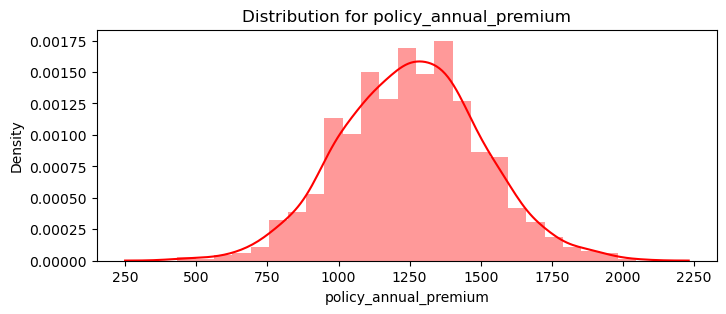

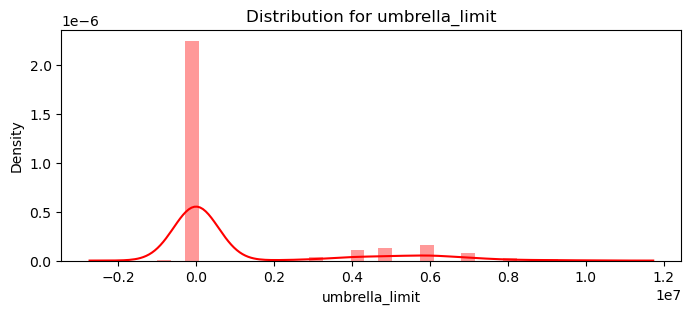

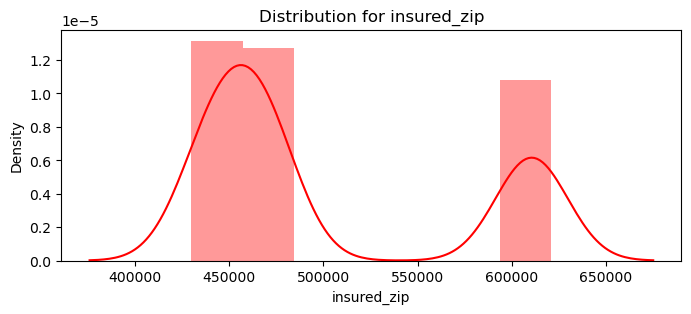

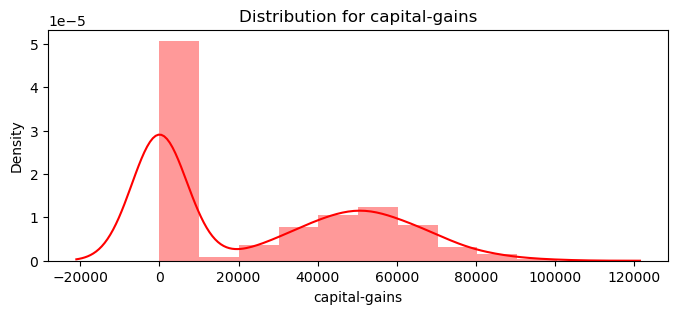

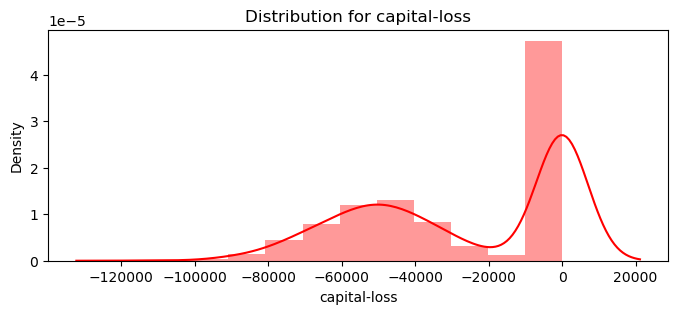

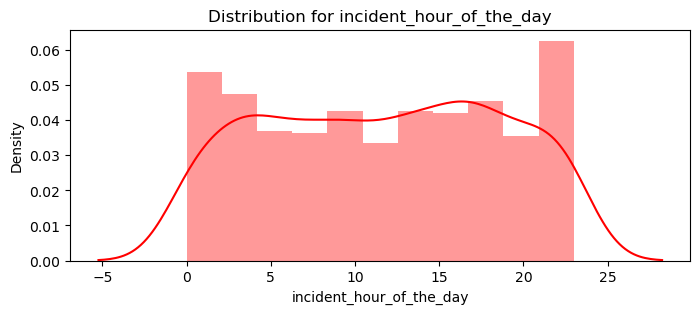

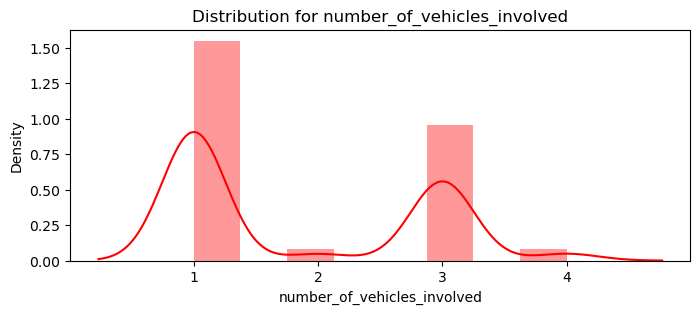

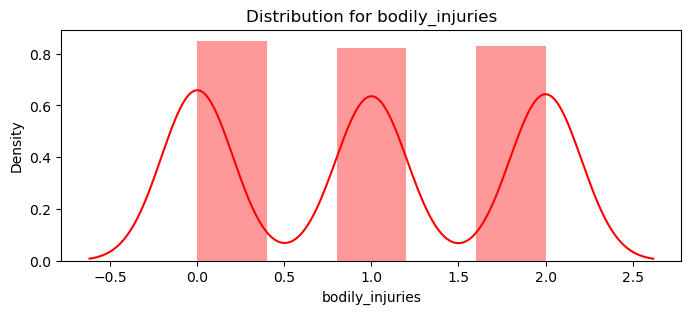

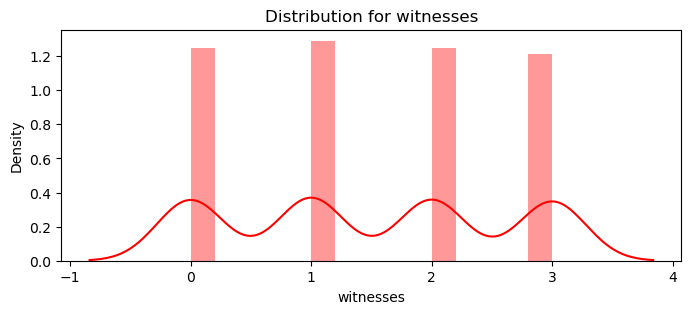

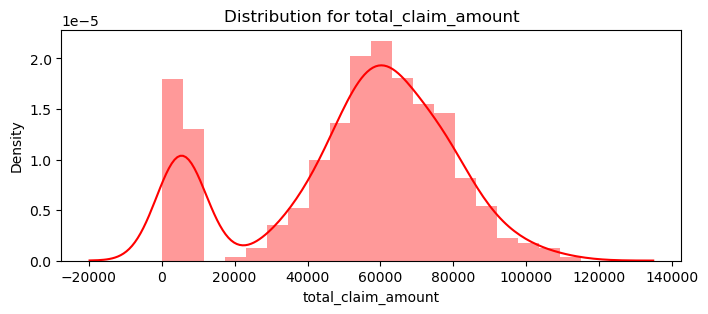

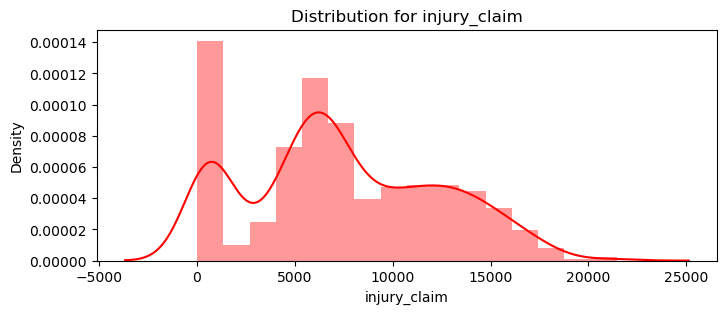

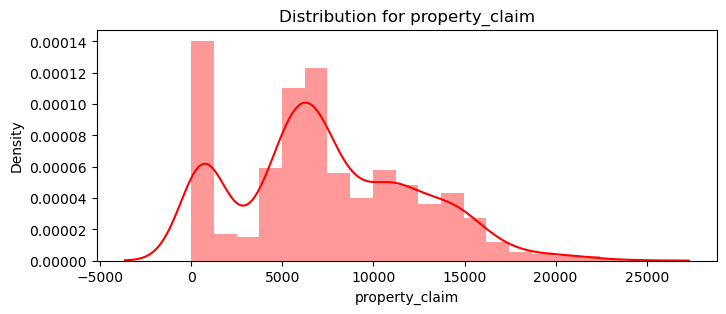

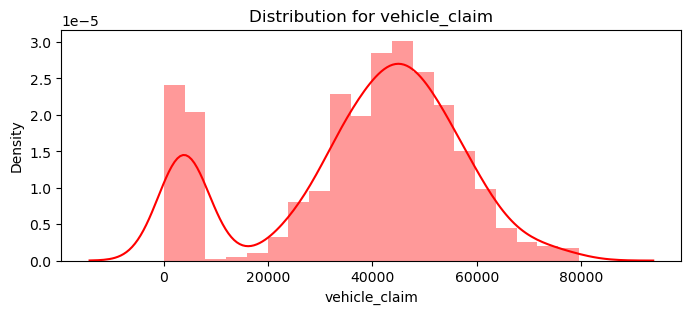

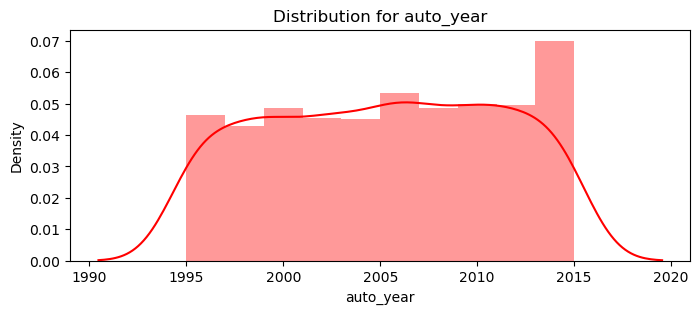

In [20]:
# 숫자형 column 목록을 추가
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

for feat in numeric_features: 
    distplot(feat, df)

- Standard Scaler 적용 (plot 시 color='c')

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

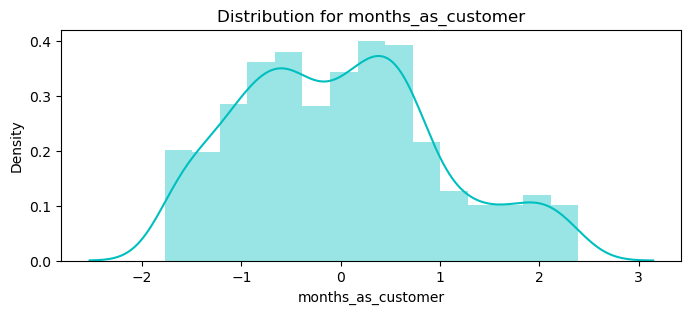

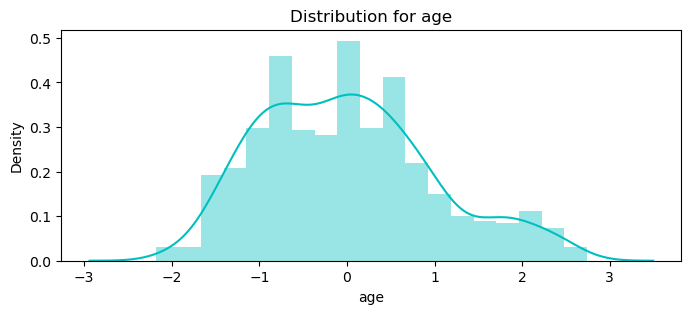

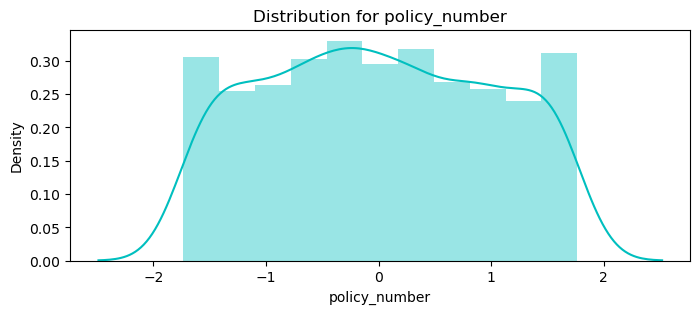

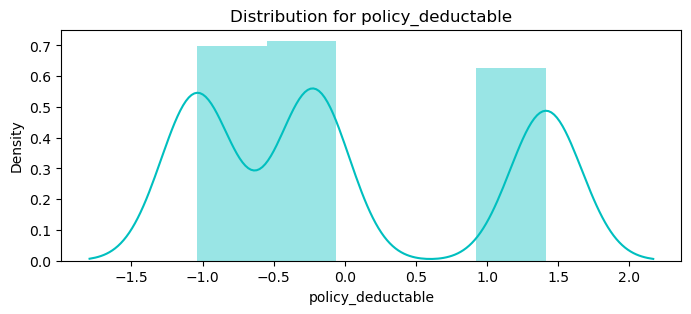

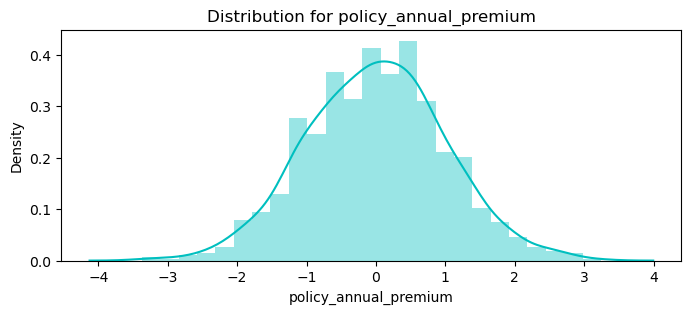

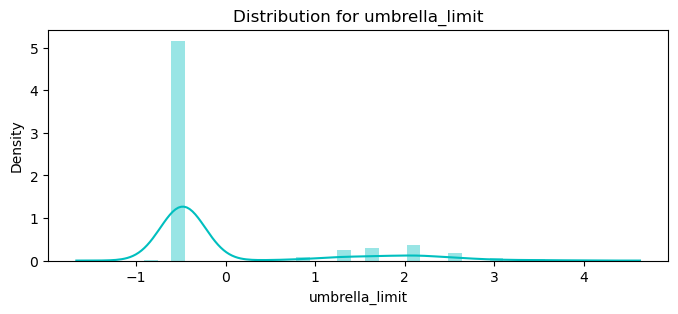

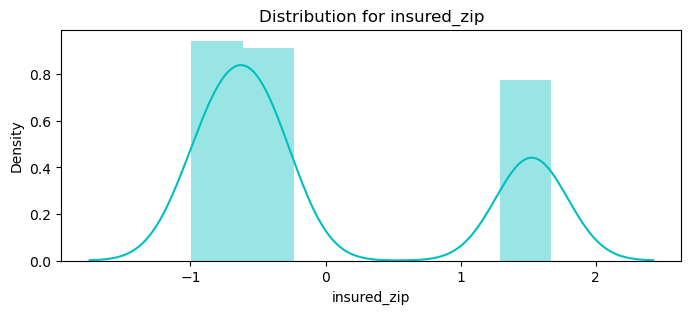

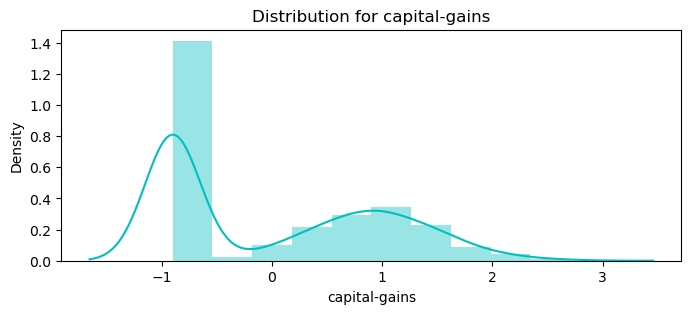

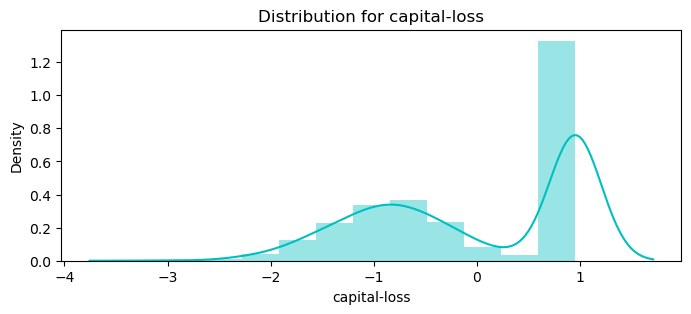

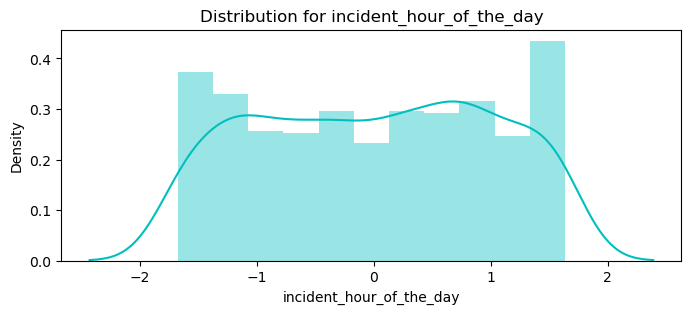

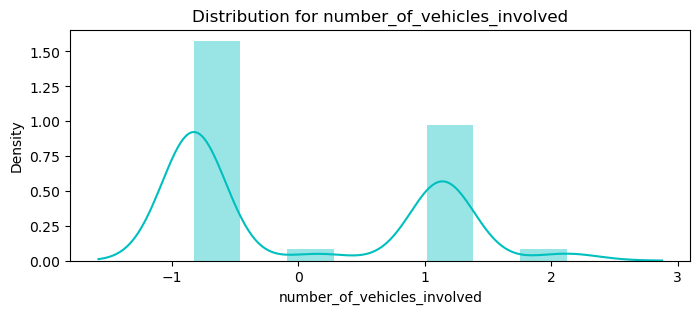

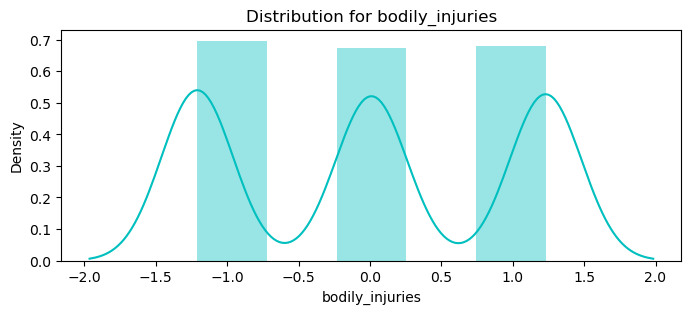

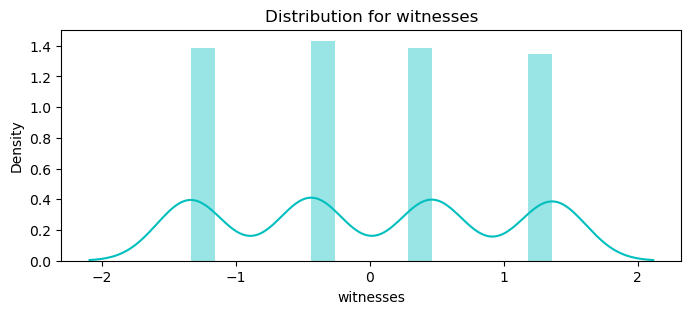

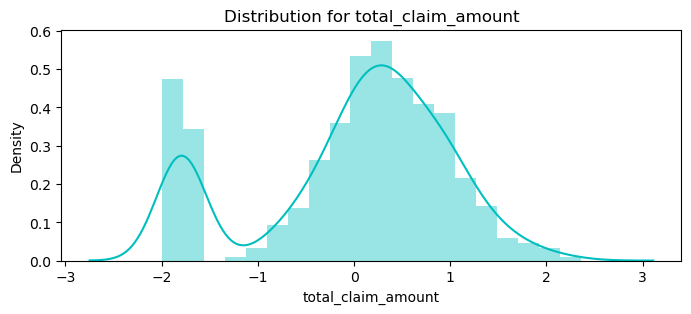

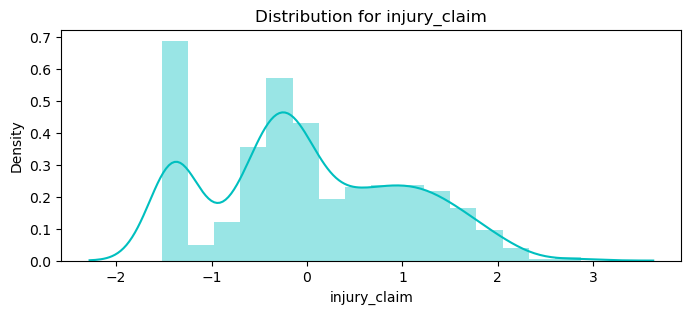

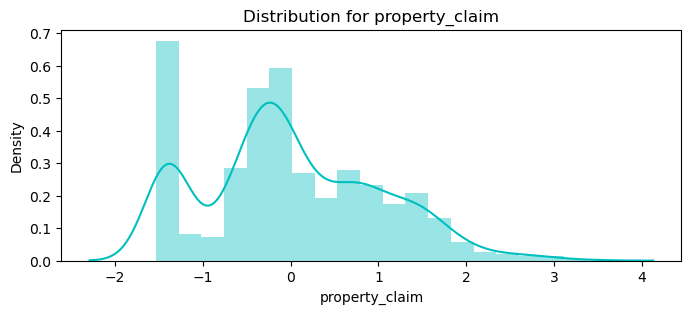

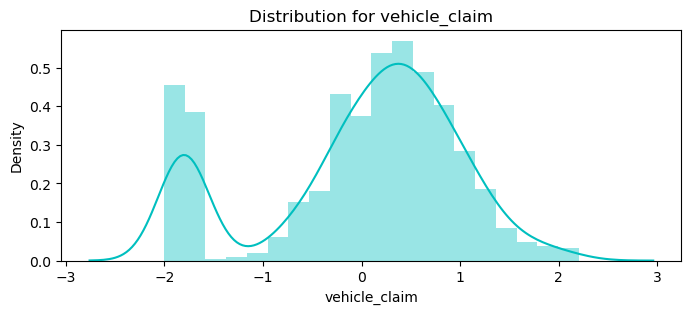

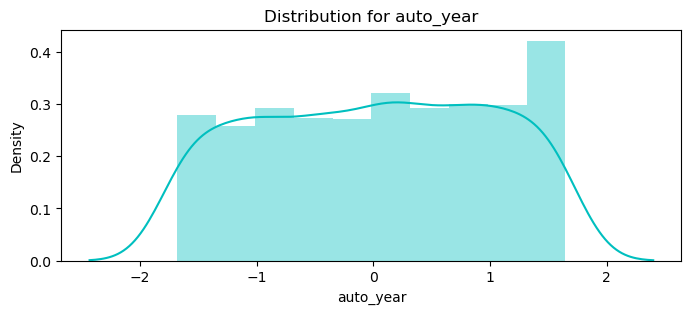

In [21]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler 적용
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)

# 변환된 데이터의 분포 시각화
for feat in numeric_features: 
    distplot(feat, df_scaled, color='c')


## 모델링

- 학습데이터 생성 (X, y)

In [25]:
# 원본 데이터프레임에서 'fraud_reported' 열을 타겟 변수로 설정
y = df['fraud_reported']

# 스케일링된 데이터프레임에서 'fraud_reported' 열을 제외한 나머지를 피처로 설정
X = df_scaled.drop('fraud_reported', axis=1) if 'fraud_reported' in df_scaled.columns else df_scaled

- 학습, 테스트 데이터 분리
- 발산방지를 위해 StandardScaler 적용

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행
X_test = scaler.transform(X_test_raw)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

- 모듈 임포트

In [28]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report

- KNN

<img src="https://wikidocs.net/images/page/32057/%EA%B7%B8%EB%A6%BC12.png" />

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
# 학습
# 예측, 스코어
#print(classification_report(y_test, predict_y))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행
X_test = scaler.transform(X_test_raw)

# KNN 모델 생성 및 학습 (이웃의 개수는 임의로 5로 설정)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행 
predict_y = knn_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,predict_y))
print("Confusion Matrix: \n", confusion_matrix(y_test,predict_y))
print("Classification Report: \n",classification_report(y_test,predict_y))


Accuracy:  0.705
Confusion Matrix: 
 [[133  12]
 [ 47   8]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       145
           1       0.40      0.15      0.21        55

    accuracy                           0.70       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.65      0.70      0.65       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

- SVM

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzAzMjhfMTUz/MDAxNDkwNzEyNzc1MjU1.4uVEoab61cib-0qZb-hMSzb0OYhrB0C5Iu2czvwhJWwg.9K9Jzd5EXanL_EiRkyeQO4dVFZMUQaOn2PAnA2dNqhEg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2" />

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.svm import SVC

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행
X_test = scaler.transform(X_test_raw)

# SVM 모델 생성 및 학습 (여기서는 커널 함수로 RBF(Radial Basis Function)를 사용하였습니다.)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행 
predict_y = svm_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,predict_y))
print("Confusion Matrix:\n", confusion_matrix(y_test,predict_y))
print("Classification Report:\n",classification_report(y_test,predict_y))

Accuracy:  0.725
Confusion Matrix:
 [[145   0]
 [ 55   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

- Random Forest

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" />

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 학습
# 예측
print(classification_report(y_test, prediction_test))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행합니다.
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행합니다.
X_test = scaler.transform(X_test_raw)

# Random Forest 모델 생성 및 학습 (여기서는 트리의 개수(n_estimators)를 100으로 설정하였습니다.)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행 
prediction_test = rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,prediction_test))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_test))
print("Classification Report:\n",classification_report(y_test,prediction_test))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Accuracy:  0.72
Confusion Matrix:
 [[144   1]
 [ 55   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.99      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.52      0.72      0.61       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


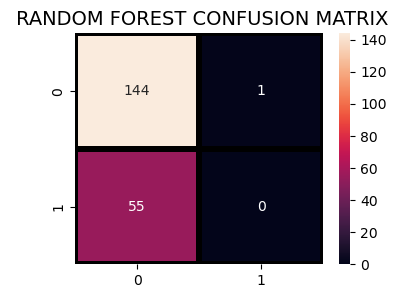

In [34]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


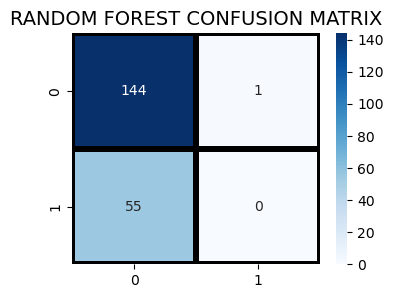

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 생성
cm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=3, linecolor="k", cmap='Blues')

plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

In [35]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

NameError: name 'model_rf' is not defined

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


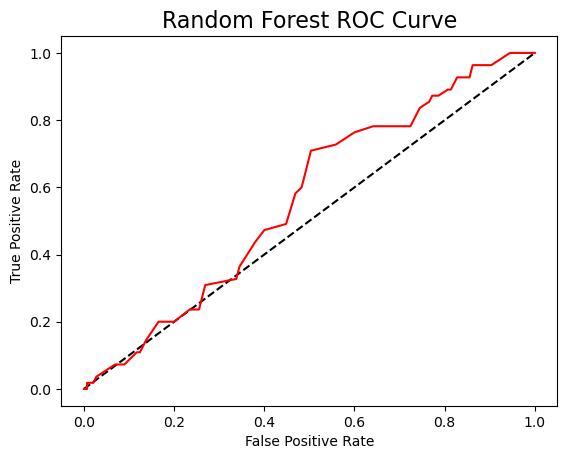

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# 테스트 데이터에 대한 예측 확률 계산
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
# ROC Curve를 위한 값 계산
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

- Logistic Regression

<img src="https://velog.velcdn.com/images/73syjs/post/9ece82c2-0abb-4379-b0a7-74ed203eaf8d/image.png" />

In [ ]:
from sklearn.linear_model import LogisticRegression
# 학습
# 예측

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행합니다.
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행합니다.
X_test = scaler.transform(X_test_raw)

# Logistic Regression 모델 생성 및 학습 
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행 
prediction_test = logreg_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,prediction_test))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_test))
print("Classification Report:\n",classification_report(y_test,prediction_test))

Accuracy:  0.73
Confusion Matrix:
 [[145   0]
 [ 54   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       145
           1       1.00      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.73      0.62       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


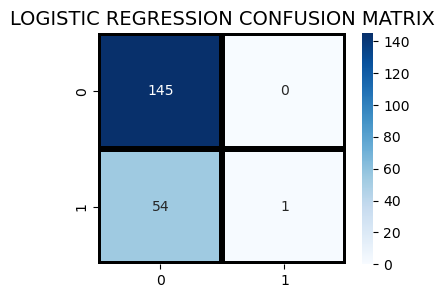

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 생성
cm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=3, linecolor="k", cmap='Blues')

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


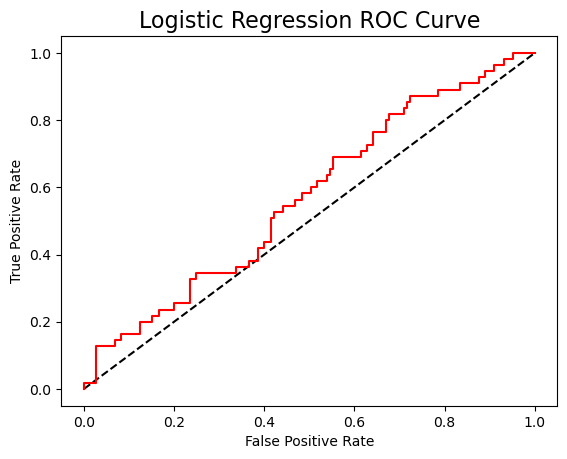

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 예측 확률 계산
y_pred_prob = logreg_model.predict_proba(X_test)[:,1]

# ROC Curve를 위한 값 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

- Decision Tree Classifier

<img src="https://bigwhalelearning.files.wordpress.com/2014/11/titanic_heuristic.png" />

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 학습
print(classification_report(y_test, predictdt_y))

- Gradient Boosting Classifier

<img src="https://bradleyboehmke.github.io/HOML/images/boosted-trees-process.png" />

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 학습
print(classification_report(y_test, gb_pred))


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행합니다.
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행합니다.
X_test = scaler.transform(X_test_raw)

# Decision Tree Classifier 모델 생성 및 학습 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# 테스트 데이터에 대한 예측 수행 
predictdt_y = dt_model.predict(X_test)

print("Classification Report:\n",classification_report(y_test,predictdt_y))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       145
           1       0.29      0.20      0.24        55

    accuracy                           0.65       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.61      0.65      0.62       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


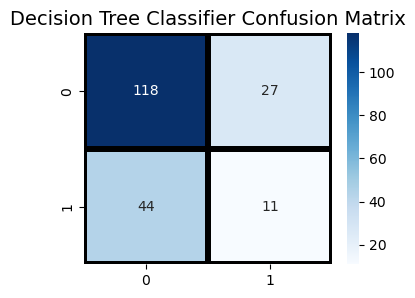

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 생성
cm = confusion_matrix(y_test, predictdt_y)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=3, linecolor="k", cmap='Blues')

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=14)
plt.show()

## 검증

- Voting Classifier

Voting을 통해 여러 모델을가지고 예측

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

# 학습
print(classification_report(y_test, predictions))

In [53]:
pip install xgboost  # or conda install -c conda-forge xgboost if you're using Anaconda distribution 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from xgboost import XGBClassifier # 이 부분 제거 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# GradientBoostingClassifier 추가 
from sklearn.ensemble import GradientBoostingClassifier

# 먼저 원본 데이터를 train/test로 분리합니다.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

# Standard Scaler 객체 생성
scaler = StandardScaler()

# Train data에 대해서 fit과 transform을 한번에 수행합니다.
X_train = scaler.fit_transform(X_train_raw)

# Test data에 대해서는 fit하지 않고 transform만 수행합니다.
X_test = scaler.transform(X_test_raw)

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

eclf1.fit(X_train,y_train)
predictions=eclf1.predict(X_test)
print(classification_report(y_test,predictions))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.33      0.02      0.03        55

    accuracy                           0.72       200
   macro avg       0.53      0.50      0.44       200
weighted avg       0.62      0.72      0.62       200



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


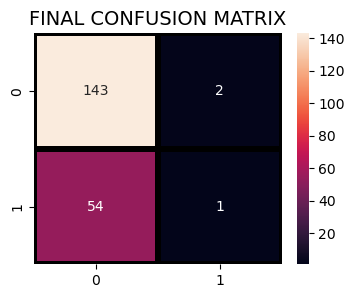

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


<module 'matplotlib.pyplot' from 'c:\\ProgramData\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

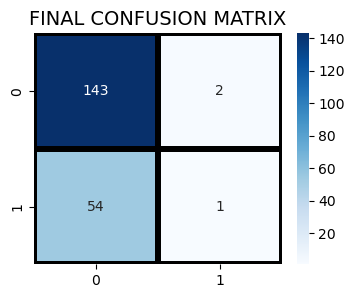

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 생성
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=3, linecolor="k", cmap='Blues')

plt.title("FINAL CONFUSION MATRIX", fontsize=14)
plt

### 정확도

In [66]:
from sklearn.metrics import accuracy_score

# Accuracy 계산
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 72.00%


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### Recall

In [67]:
from sklearn.metrics import recall_score

# Recall 계산
recall = recall_score(y_test, predictions)

print(f'Recall: {recall*100:.2f}%')

Recall: 1.82%


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d